
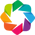

In [12]:
#import matplotlib
import poloniex
import datetime
import holoviews as hv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream
hv.notebook_extension('bokeh')

In [13]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=360)
ether = poloniex.get_ohlc('USDT_ETH',start, end)
btc = poloniex.get_ohlc('USDT_BTC', start,end)

In [14]:
def load_symbol(symbol, **kwargs):
    df = data[symbol]
    #df.reset_index(level=0, inplace=True)
    df['date'] = df.index
    return hv.Curve(df, ('date', 'Date'), ('close', 'Close price'))

stock_symbols = ['ETH', 'BTC',]
data = {"ETH": ether, 'BTC':btc}
dmap = hv.DynamicMap(load_symbol, kdims='Symbol').redim.values(Symbol=stock_symbols)

In [16]:
data

{'BTC':                             close          high           low          open  \
 date                                                                          
 2017-01-30 17:30:00    917.675978    917.675978    915.500000    915.877458   
 2017-01-30 17:35:00    918.540000    918.540000    915.736829    915.756259   
 2017-01-30 17:40:00    918.540000    918.540000    916.071085    918.540000   
 2017-01-30 17:45:00    918.540000    918.540000    916.100000    916.100000   
 2017-01-30 17:50:00    916.182732    918.750000    916.182732    918.666903   
 2017-01-30 17:55:00    916.116831    918.706726    916.116831    918.651963   
 2017-01-30 18:00:00    918.499309    918.499309    916.116831    916.116831   
 2017-01-30 18:05:00    918.242109    919.015938    918.242109    918.533830   
 2017-01-30 18:10:00    918.242109    919.593788    918.242109    918.242109   
 2017-01-30 18:15:00    918.242200    920.000000    918.242200    918.242200   
 2017-01-30 18:20:00    917.60550

In [15]:
%%opts Curve [width=700] {+framewise}
dmap

:DynamicMap   [Symbol]